# Card Image Recognition

In [3]:
%matplotlib inline

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras
import time
from sklearn.model_selection import train_test_split

from pathlib import Path
from PIL import Image

In [3]:
!ls 

'Card Image Recogntion.ipynb'   Untitled.ipynb	 labels.txt    to_ocr.png
'Poker Machine-Allan.ipynb'     all_labels.txt	 pairs_small
'Poker Machine.ipynb'	        hands_images	 resources


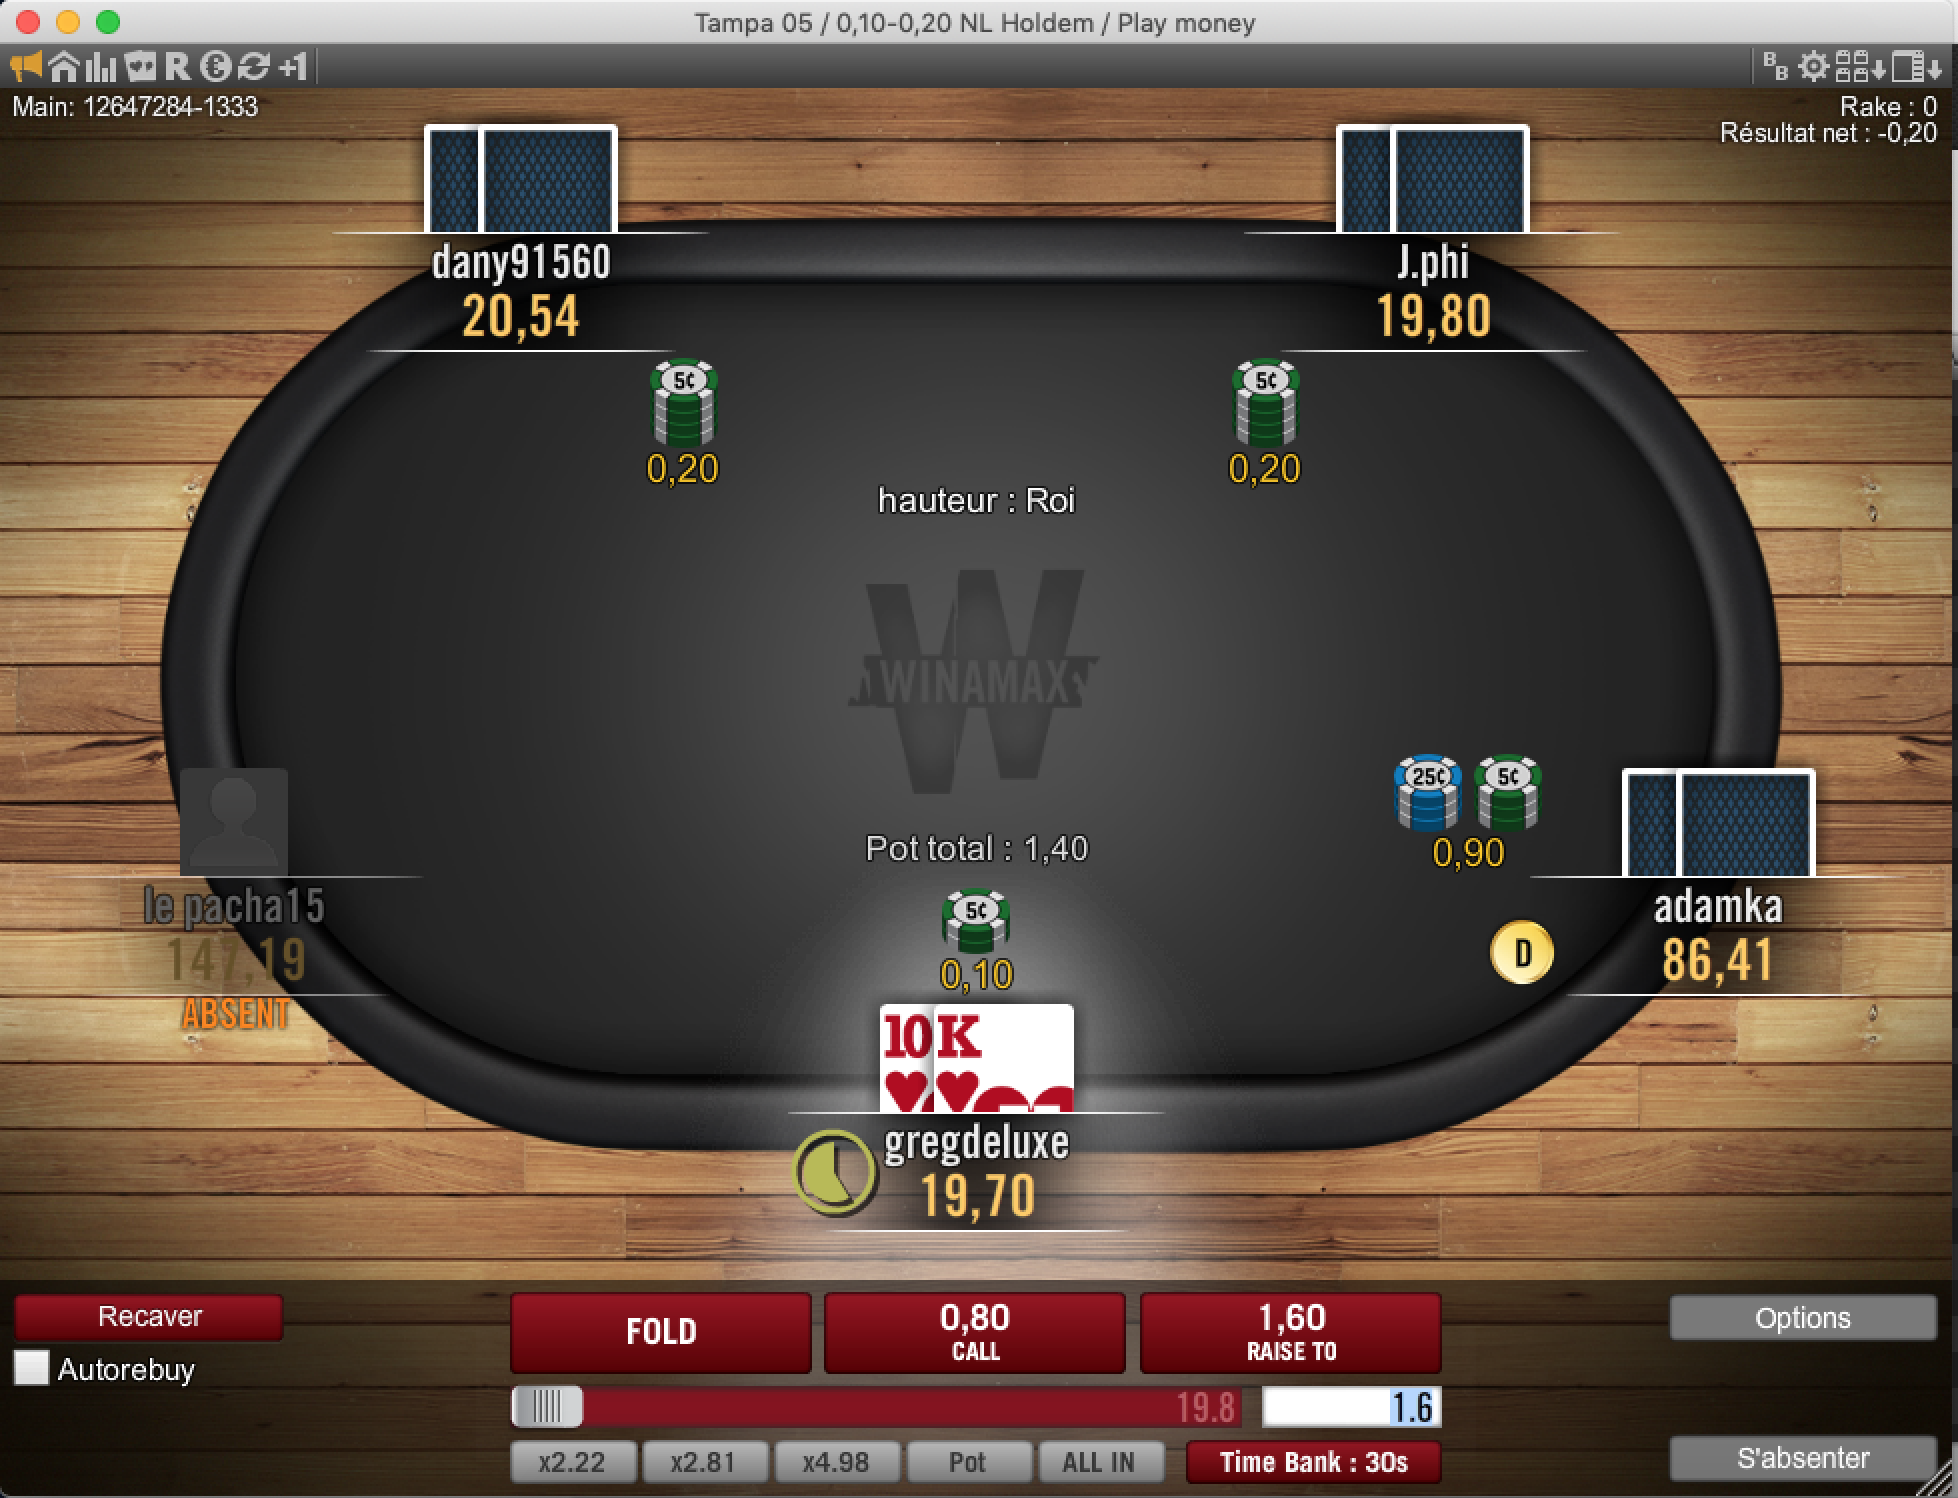

In [4]:
background = Image.open(Path.cwd() / 'resources' / 'Screenshot 2019-04-08 at 02.17.13.png') ; background

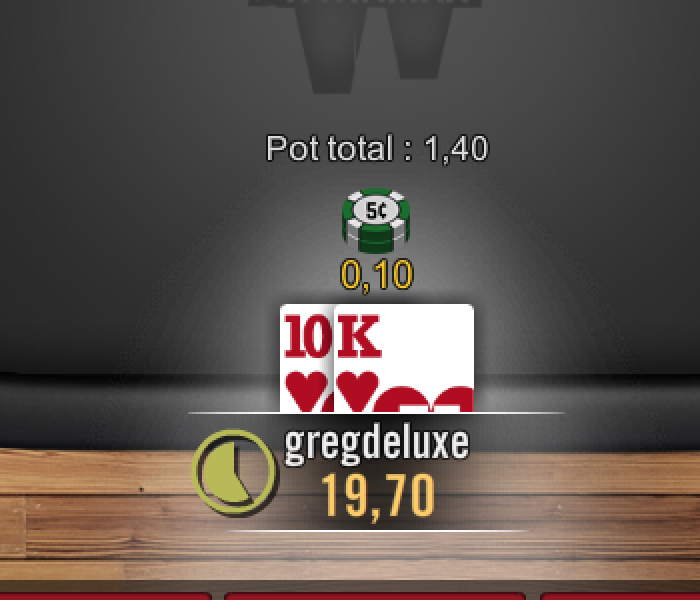

In [5]:
player_frame = background.crop((600, 700, 1300, 1300)) ; player_frame

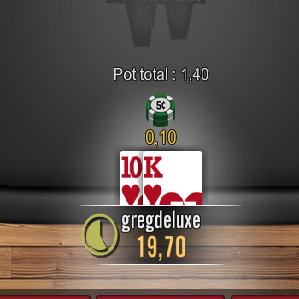

In [7]:
player_frame.resize((299, 299))

## Data Preparation

In [6]:
path_pairs = Path.cwd() / 'hands_images'
files = path_pairs.glob('**/*.png')
files = [x for x in files]
file = files[1] ; file

PosixPath('/home/dev/notebooks/hands_images/3-spade_Q-diamond.png')

We only need to change filenames once


In [11]:

# for file in files:
#     w = file.stem.split('-')
#     cardA = f"{w[1]}-{w[2].split('.')[0]}"
#     cardB = f"{w[3]}-{w[4].split('.')[0]}"
#     new_name = f'{cardA}_{cardB}.png'
#     file.replace(file.with_name(new_name))

### Creation of the ALL_LABELS file

In [12]:
from itertools import product
import os

In [13]:
numbers = [x+2 for x in range(9)]
numbers.extend(['J', 'Q', 'K', 'A'])
colors = ['club', 'heart', 'spade', 'diamond']

We only need to change filenames once


In [67]:
# all_labels = Path.cwd() / 'labels.txt'
# with all_labels.open(mode='a') as fid:
#     for number, color in product(numbers, colors):
#         fid.write(f'{number}-{color}\n') 

### Load Images

In [4]:
path_pairs = Path.cwd() / 'hands_images'
files = path_pairs.glob('**/*.png')
files = [x for x in files]
file = files[1] ; file

PosixPath('/home/dev/notebooks/hands_images/3-spade_Q-diamond.png')

In [5]:
im = Image.open(file)

In [16]:
image = np.asarray(im)[...,:3]
image.shape

(1498, 1958, 3)

In [17]:
for number, color in product(numbers, colors):
    
    print(path_pairs / f'{}_{cardB}.png')

SyntaxError: f-string: empty expression not allowed (<ipython-input-17-5003b12daf54>, line 3)

First, we create the reduces focused images

In [7]:
path_small = Path.cwd() / 'resources' / 'pairs_299x299'

We only need to create small images once

In [22]:
# for file in files:
#     im = Image.open(file)
#     im = im.crop((600, 700, 1300, 1300)).resize((299, 299))
#     im.save(path_small / file.name)

In [8]:
files = path_small.glob('**/*.png')
files = [x for x in files]
file = files[1] ; file

PosixPath('/home/dev/notebooks/resources/pairs_299x299/3-spade_Q-diamond.png')

In [9]:
X = np.array([np.asarray(Image.open(file))[...,:3] for file in files])

In [10]:
X.shape

(1326, 299, 299, 3)

### Creation Y labels

In [8]:
with open(Path.cwd() / 'labels.txt') as f:
    labels = f.read().splitlines()
class_count = len(labels)
ground_truth = np.zeros(class_count, dtype=np.float32)

In [9]:
y_list = []
for file in files:
    ground_truth = np.zeros(class_count, dtype=np.float32)
    for label in file.stem.split('_'):
        idx = labels.index(label)
        ground_truth[idx] = 1.0
    y_list.append(ground_truth)

In [13]:
y = np.array(y_list)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)

In [15]:
X_train.shape, X_test.shape

((994, 100, 100, 3), (332, 100, 100, 3))

## Model Creation

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[100, 100, 3]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(180, activation="relu"),
    keras.layers.Dense(52, activation="sigmoid")
])

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.compile(loss='binary_crossentropy',
             optimizer=keras.optimizers.SGD(lr=0.01), metrics=["accuracy"])

In [18]:
history = model.fit(X, y, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1326/1326 [==============================] - 71s 54ms/sample - loss: 0.6656 - acc: 0.7209
Epoch 2/20
1326/1326 [==============================] - 65s 49ms/sample - loss: 0.4590 - acc: 0.8617
Epoch 3/20
1326/1326 [==============================] - 131s 99ms/sample - loss: 0.1887 - acc: 0.9615
Epoch 4/20
1326/1326 [==============================] - 110s 83ms/sample - loss: 0.1694 - acc: 0.9615
Epoch 5/20
1326/1326 [==============================] - 78s 59ms/sample - loss: 0.1658 - acc: 0.9615
Epoch 6/20
1326/1326 [==============================] - 67s 51ms/sample - loss: 0.1643 - acc: 0.9615
Epoch 7/20
1326/1326 [==============================] - 63s 47ms/sample - loss: 0.1638 - acc: 0.9615
Epoch 8/20
1326/1326 [==============================] - 59s 44ms/sample - loss: 0.1635 - acc: 0.9615
Epoch 9/20
1326/1326 [==============================] - 59s 45ms/sample - loss: 0.1634 - acc: 0.9615
Epoch 10/20
1326/1326 [==================

In [19]:
y_proba = model.predict(X_test)

In [20]:
y_pred = y_proba.round()

In [21]:
import pandas as pd

In [22]:
df = pd.DataFrame(y_proba)

In [23]:
df.max()

0     0.041721
1     0.040550
2     0.043831
3     0.037739
4     0.037373
5     0.043518
6     0.037280
7     0.042738
8     0.037678
9     0.038160
10    0.036070
11    0.038354
12    0.040176
13    0.035914
14    0.049795
15    0.040409
16    0.047002
17    0.038569
18    0.042407
19    0.039311
20    0.042600
21    0.045192
22    0.038878
23    0.042671
24    0.041450
25    0.042214
26    0.037484
27    0.040055
28    0.043160
29    0.044573
30    0.044962
31    0.040139
32    0.040292
33    0.040147
34    0.035588
35    0.041006
36    0.040267
37    0.043309
38    0.046139
39    0.039575
40    0.041136
41    0.043725
42    0.040191
43    0.042336
44    0.039529
45    0.039658
46    0.036395
47    0.042642
48    0.046765
49    0.038683
50    0.036503
51    0.040863
dtype: float32

#### Pre-trained models